# Sinh câu hỏi và câu trả lời dùng Groq API dựa trên Vector Database

Notebook này minh họa cách sử dụng module `question_generator.py` để sinh cả câu hỏi và câu trả lời từ các chunks trong vector database theo ba thang đo của Bloom (Remember, Understand, Apply) sử dụng Groq API.

In [1]:
# Import các thư viện cần thiết
import os
import sys
import json
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Đảm bảo có thể import modules từ src
MODULE_PATH = os.path.abspath(os.path.join('..'))
if MODULE_PATH not in sys.path:
    sys.path.append(MODULE_PATH)

In [2]:
# Load biến môi trường từ file .env
load_dotenv()

# Kiểm tra xem đã có GROQ_API_KEY chưa
groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None or groq_api_key == "your_groq_api_key_here":
    raise ValueError("⚠️ Chưa cấu hình GROQ_API_KEY trong file .env. "
                    "Hãy thêm GROQ_API_KEY=<your_api_key> vào file .env!")

## Import các module cần thiết

In [3]:
# Import các module cần thiết từ project
from src.embed.faiss_manager import initialize_embedding_model, load_vector_db
from src.generation.question_generator import GroqQuestionGenerator, generate_questions_from_topics

2025-04-21 23:24:40,263 - question_generator - INFO - Logger 'question_generator' đã được khởi tạo.
INFO:question_generator:Logger 'question_generator' đã được khởi tạo.
INFO:question_generator:Logger 'question_generator' đã được khởi tạo.


## Đọc danh sách chủ đề từ file

In [4]:
# Đường dẫn tới file chủ đề
topic_file_path = Path("../data/sample_topics.txt")

# Đọc danh sách chủ đề
with open(topic_file_path, "r", encoding="utf-8") as f:
    topics = [line.strip() for line in f.readlines() if line.strip()]

print(f"📋 Đã tìm thấy {len(topics)} chủ đề:")
for i, topic in enumerate(topics, 1):
    print(f"  {i}. {topic}")

📋 Đã tìm thấy 5 chủ đề:
  1. Luật Bảo vệ sức khỏe cộng đồng
  2. Quyền lợi y tế người cao tuổi
  3. Chính sách y tế học đường
  4. Quy định về an toàn thực phẩm
  5. Chính sách bảo hiểm y tế


## Khởi tạo model embedding và load vector database

In [5]:
# Đường dẫn tới vector database
vector_db_path = Path("../data/gold/db_faiss_phapluat_yte_full_final")

# Khởi tạo model embedding
embedding_model_name = "bkai-foundation-models/vietnamese-bi-encoder"
embeddings = initialize_embedding_model(embedding_model_name)

if not embeddings:
    raise ValueError(f"❌ Không thể khởi tạo model embedding '{embedding_model_name}'")
else:
    print(f"✅ Đã khởi tạo model embedding '{embedding_model_name}' thành công")

✅ Đã khởi tạo model embedding 'bkai-foundation-models/vietnamese-bi-encoder' thành công


In [6]:
# Load vector database
vector_db = load_vector_db(vector_db_path, embeddings)

if not vector_db:
    raise ValueError(f"❌ Không thể tải vector database từ {vector_db_path}")
else:
    print(f"✅ Đã tải vector database thành công. Số lượng vectors: {vector_db.index.ntotal}")

✅ Đã tải vector database thành công. Số lượng vectors: 15498


## Khởi tạo Question Generator với Groq API

In [7]:
# Khởi tạo generator với model Llama 3 của Groq
try:
    generator = GroqQuestionGenerator(model_name="llama3-70b-8192")
    print("✅ Đã khởi tạo thành công Generator với Groq API")
except Exception as e:
    print(f"❌ Lỗi khi khởi tạo Generator: {e}")

2025-04-21 23:25:11,920 - question_generator - INFO - Đã khởi tạo Groq Client với model 'llama3-70b-8192'
INFO:question_generator:Đã khởi tạo Groq Client với model 'llama3-70b-8192'
INFO:question_generator:Đã khởi tạo Groq Client với model 'llama3-70b-8192'


✅ Đã khởi tạo thành công Generator với Groq API


## Sinh câu hỏi và câu trả lời cho một chủ đề thử nghiệm

In [8]:
# Chọn một chủ đề để thử nghiệm
test_topic = topics[0]  # Chủ đề đầu tiên trong danh sách

print(f"🔍 Sinh câu hỏi và câu trả lời cho chủ đề: '{test_topic}'...")

# Sinh câu hỏi và câu trả lời
questions_by_level = generator.generate_questions_for_topic(
    topic=test_topic,
    vector_db=vector_db,
    num_questions_per_level=2,  # 2 câu hỏi mỗi cấp độ
    chunks_per_topic=5,         # Sử dụng 5 chunks
    temperature=0.7             # Độ sáng tạo
)

2025-04-21 23:25:11,936 - question_generator - INFO - Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'


🔍 Sinh câu hỏi và câu trả lời cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'...


2025-04-21 23:25:12,141 - question_generator - INFO - Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
2025-04-21 23:25:13,451 - question_generator - INFO - Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.31 giây
INFO:question_generator:Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.31 giây
2025-04-21 23:25:13,455 - question_generator - INFO - Đã sinh 2 cặp câu hỏi-trả lời cấp độ remember cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã sinh 2 cặp câu hỏi-trả lời cấp độ remember cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
2025-04-21 23:25:13,451 - question_generator - INFO - Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.31 giây
INFO:question_generator:Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.31 giây
2025-04-21 23:25:13,455 - question_

In [9]:
# Hiển thị kết quả
print(f"\n📝 Kết quả sinh câu hỏi và câu trả lời cho '{test_topic}':\n")

bloom_level_names = {
    "remember": "🧠 Remember (Nhớ)",
    "understand": "🤔 Understand (Hiểu)", 
    "apply": "🛠️ Apply (Áp dụng)"
}

for level, qa_pairs in questions_by_level.items():
    print(f"\n{bloom_level_names[level]}:\n")
    
    for i, qa_pair in enumerate(qa_pairs, 1):
        print(f"{i}. Câu hỏi: {qa_pair['question']}")
        print(f"   Trả lời: {qa_pair['answer']}\n")


📝 Kết quả sinh câu hỏi và câu trả lời cho 'Luật Bảo vệ sức khỏe cộng đồng':


🧠 Remember (Nhớ):

1. Câu hỏi: Theo Điều 15, cơ sở kinh doanh thực phẩm chức năng phải đáp ứng những điều kiện nào về cơ sở vật chất, trang thiết bị, dụng cụ và người trực tiếp kinh doanh?
   Trả lời: Theo quy định tại các điều 4, 5 và 6 Thông tư số 16/2012/TT-BYT ngày 22 tháng 10 năm 2012 của Bộ trưởng Bộ Y tế.

2. Câu hỏi: Theo Điều 3, nội dung chăm sóc sức khỏe người cao tuổi tại cộng đồng bao gồm những hoạt động nào?
   Trả lời: Tuyên truyền phổ biến kiến thức về rèn luyện thân thể, tăng cường sức khỏe và phòng bệnh; hướng dẫn người cao tuổi các kỹ năng phòng bệnh, chữa bệnh và tự chăm sóc sức khỏe; tổ chức khám sức khỏe để lập hồ sơ theo dõi sức khỏe cho người cao tuổi; khám sức khỏe định kỳ người cao tuổi được thực hiện ít nhất một lần một năm; khám bệnh, chữa bệnh cho người cao tuổi tại trạm y tế xã, phường, thị trấn và tại nơi cư trú của người cao tuổi.


🤔 Understand (Hiểu):

1. Câu hỏi: Giải thích 

## Sinh câu hỏi và câu trả lời cho tất cả các chủ đề

In [10]:
# Thay đổi thông số nếu muốn
num_questions_per_level = 2
chunks_per_topic = 5
groq_model = "llama3-70b-8192"  # Hoặc "llama3-8b-8192" nếu muốn tiết kiệm tokens

print(f"🚀 Bắt đầu sinh câu hỏi và câu trả lời cho {len(topics)} chủ đề...\n")

🚀 Bắt đầu sinh câu hỏi và câu trả lời cho 5 chủ đề...



In [11]:
# Sinh câu hỏi và câu trả lời cho tất cả chủ đề
all_questions = generate_questions_from_topics(
    topic_file_path=topic_file_path,
    vector_db_path=vector_db_path,
    output_dir="../outputs",
    embedding_model_name=embedding_model_name,
    groq_model_name=groq_model,
    num_questions_per_level=num_questions_per_level,
    chunks_per_topic=chunks_per_topic
)

2025-04-21 23:25:17,719 - question_generator - INFO - Bắt đầu quá trình sinh câu hỏi từ các chủ đề
INFO:question_generator:Bắt đầu quá trình sinh câu hỏi từ các chủ đề
2025-04-21 23:25:17,722 - question_generator - INFO - Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Bắt đầu quá trình sinh câu hỏi từ các chủ đề
2025-04-21 23:25:17,722 - question_generator - INFO - Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
2025-04-21 23:25:21,635 - question_generator - INFO - Đã tải vector database thành công. Số lượng vectors: 15498
INFO:question_generator:Đã tải vector database thành công. Số lượng vectors: 15498
2025-04-21 23:25:21,635 - question_generator - INFO - Đã tải vector database thành công. Số lượng vectors: 15498
INFO:question_generator:Đã tải vector database thành công. Số lượng vectors: 15498
2025-04-21 23:2

## Lưu kết quả thành JSON với metadata đầy đủ

In [12]:
# Thư mục lưu kết quả
output_path = Path("../outputs/question_generation")
output_path.mkdir(parents=True, exist_ok=True)

# Tạo tên file với timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = output_path / f"questions_with_answers_groq_{timestamp}_jupyter.json"

# Thêm metadata vào mỗi câu hỏi
questions_with_metadata = []
for question in all_questions:
    questions_with_metadata.append({
        "topic": question["topic"],
        "level": question["level"],
        "question": question["question"],
        "answer": question["answer"],
        "metadata": {
            "generated_at": datetime.now().isoformat(),
            "model": groq_model,
            "question_length": len(question["question"]),
            "answer_length": len(question["answer"]),
            "question_words": len(question["question"].split()),
            "answer_words": len(question["answer"].split())
        }
    })

# Lưu kết quả với định dạng JSON
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(questions_with_metadata, f, ensure_ascii=False, indent=2)

print(f"✅ Đã lưu kết quả vào file: {output_file}")

✅ Đã lưu kết quả vào file: ..\outputs\question_generation\questions_with_answers_groq_20250421_232916_jupyter.json


In [13]:
# Hiển thị một mẫu câu hỏi với metadata đầy đủ
import pprint

print("📋 Mẫu câu hỏi với metadata đầy đủ:\n")
pprint.pprint(questions_with_metadata[0], width=100)

📋 Mẫu câu hỏi với metadata đầy đủ:

{'answer': ' Nhà thuốc phải có khu bày bán riêng cho sản phẩm thực phẩm chức năng.',
 'level': 'remember',
 'metadata': {'answer_length': 70,
              'answer_words': 15,
              'generated_at': '2025-04-21T23:29:16.451081',
              'model': 'llama3-70b-8192',
              'question_length': 114,
              'question_words': 25},
 'question': 'Theo quy định, thực phẩm chức năng phải được bày bán riêng biệt với khu vực bày bán '
             'các loại thực phẩm khác ở đâu?',
 'topic': 'Luật Bảo vệ sức khỏe cộng đồng'}


## Phân tích chất lượng câu hỏi và câu trả lời

In [14]:
# Tạo DataFrame từ danh sách câu hỏi
df_questions = pd.DataFrame(all_questions)

# Thống kê độ dài của câu hỏi và câu trả lời
df_questions['question_length'] = df_questions['question'].str.len()
df_questions['answer_length'] = df_questions['answer'].str.len()
df_questions['question_words'] = df_questions['question'].apply(lambda x: len(x.split()))
df_questions['answer_words'] = df_questions['answer'].apply(lambda x: len(x.split()))

# Thống kê theo cấp độ Bloom
stats_by_level = df_questions.groupby('level')[
    ['question_length', 'answer_length', 'question_words', 'answer_words']
].agg(['mean', 'min', 'max']).round(1)

# Hiển thị kết quả
stats_by_level

question_length           answer_length           question_words  \
                      mean  min  max          mean  min  max           mean   
level                                                                         
apply                178.1  130  258         338.9  176  466           40.2   
remember              91.7   31  147         128.6   17  294           20.6   
understand           113.1   60  163         358.6   92  676           24.7   

                   answer_words           
           min max         mean min  max  
level                                     
apply       29  57         76.6  41  106  
remember     7  33         28.5   4   62  
understand  12  37         79.3  20  149

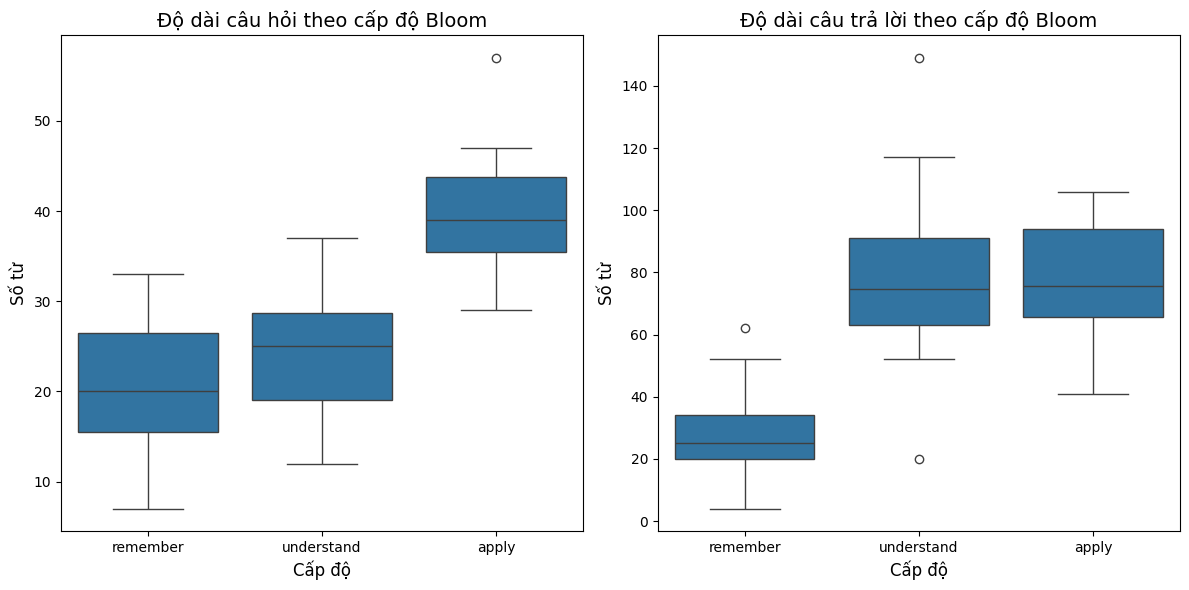

In [15]:
# Hiển thị độ dài câu hỏi và câu trả lời theo cấp độ Bloom
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="level", y="question_words", data=df_questions)
plt.title("Độ dài câu hỏi theo cấp độ Bloom", fontsize=14)
plt.xlabel("Cấp độ", fontsize=12)
plt.ylabel("Số từ", fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(x="level", y="answer_words", data=df_questions)
plt.title("Độ dài câu trả lời theo cấp độ Bloom", fontsize=14)
plt.xlabel("Cấp độ", fontsize=12)
plt.ylabel("Số từ", fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
# Đếm số câu hỏi theo chủ đề và cấp độ
print("📊 Tổng kết số lượng câu hỏi:")
print(f"- Tổng số câu hỏi: {len(questions_with_metadata)}")
print(f"- Số chủ đề: {len(topics)}")
print("- Số câu hỏi theo cấp độ:")
for level in ["remember", "understand", "apply"]:
    count = len([q for q in questions_with_metadata if q["level"] == level])
    print(f"  + {bloom_level_names[level]}: {count} câu hỏi")

📊 Tổng kết số lượng câu hỏi:
- Tổng số câu hỏi: 30
- Số chủ đề: 5
- Số câu hỏi theo cấp độ:
  + 🧠 Remember (Nhớ): 10 câu hỏi
  + 🤔 Understand (Hiểu): 10 câu hỏi
  + 🛠️ Apply (Áp dụng): 10 câu hỏi


## Hiển thị chi tiết câu hỏi và câu trả lời của một chủ đề

In [17]:
# Hiển thị mẫu câu hỏi và câu trả lời của từng loại cho một chủ đề
selected_topic = topics[1]  # Chọn chủ đề thứ hai

print(f"📋 Danh sách câu hỏi và câu trả lời cho chủ đề: '{selected_topic}'\n")

for level in ["remember", "understand", "apply"]:
    print(f"\n{bloom_level_names[level]}:\n")
    
    # Lọc câu hỏi theo chủ đề và cấp độ
    topic_questions = [q for q in all_questions 
                      if q["topic"] == selected_topic and q["level"] == level]
    
    for i, qa_pair in enumerate(topic_questions, 1):
        print(f"{i}. Câu hỏi: {qa_pair['question']}")
        print(f"   Trả lời: {qa_pair['answer']}\n")

📋 Danh sách câu hỏi và câu trả lời cho chủ đề: 'Quyền lợi y tế người cao tuổi'


🧠 Remember (Nhớ):

1. Câu hỏi: Theo quy định, người cao tuổi được hưởng quyền lợi y tế sau khi đã được chẩn đoán mắc bệnh thuộc danh mục quy định tại đâu?
   Trả lời: Khoản 1 Điều này.

2. Câu hỏi: Trạm y tế xã, phường, thị trấn có vai trò gì trong chăm sóc sức khỏe người cao tuổi?
   Trả lời: Khám bệnh, chữa bệnh cho người cao tuổi tại trạm y tế xã, phường, thị trấn và tại nơi cư trú của người cao tuổi.


🤔 Understand (Hiểu):

1. Câu hỏi: Theo quy định của Bộ Y tế, người cao tuổi được hưởng quyền lợi y tế sau khi đã được chẩn đoán mắc bệnh thuộc danh mục quy định tại khoản 1 Điều này như thế nào?
   Trả lời: Người cao tuổi được hưởng quyền lợi y tế sau khi đã được một cơ sở khám bệnh, chữa bệnh chẩn đoán xác định mắc bệnh thuộc danh mục quy định tại khoản 1 Điều này. Trường hợp tại cột tình trạng, điều kiện trong danh mục bệnh tại phụ lục ban hành kèm theo Thông tư này có quy định người bệnh được hưởng qu

## Kết luận

Notebook này đã minh họa cách sử dụng module `question_generator.py` để sinh câu hỏi và câu trả lời từ các chunks trong vector database theo ba thang đo của Bloom (Remember, Understand, Apply) sử dụng Groq API.

Chúng ta đã:
1. Khởi tạo model embedding và load vector database
2. Khởi tạo Question Generator với Groq API
3. Sinh câu hỏi và câu trả lời cho từng chủ đề
4. Lưu kết quả vào file JSON với metadata
5. Phân tích chất lượng câu hỏi và câu trả lời

Mỗi câu hỏi được lưu với cấu trúc JSON bao gồm:
- `topic`: Chủ đề của câu hỏi
- `level`: Cấp độ Bloom (remember, understand, apply)
- `question`: Nội dung câu hỏi
- `answer`: Nội dung câu trả lời
- `metadata`: Các thông tin bổ sung như thời gian tạo, model sử dụng, độ dài câu hỏi và trả lời